In [1]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from collections import Counter
import numpy as np
from gensim.models import Word2Vec as w2v
import multiprocessing
from time import time
import re
import os
import seaborn as sns
sns.set_style("darkgrid")
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

In [2]:
rx = r"\.(?=\S)"
file = "E:/project/NLP/ABC.txt"
punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*_~'''
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()

In [3]:
lemma = []
keywords = []

Total number of words:  5063
Total number of words after removal of stop_words:  2648


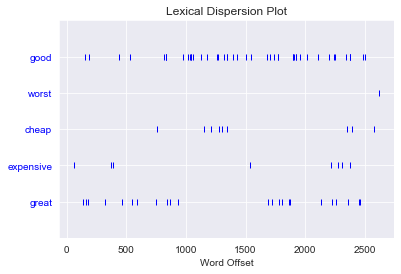

In [4]:
sample_text = open("E:/project/NLP/ABC.txt")
text = sample_text.read()
text = re.sub(rx, ". ", text)
text = text.lower()
split_text = text.split()
table = str.maketrans("", "", punctuations)
stripped = [w.translate(table) for w in split_text]
assemble = " ".join(stripped)
sentence = sent_tokenize(assemble)
tokens = word_tokenize(assemble)
remove_dot = tokens[14]
for words in tokens:
    if words == remove_dot:
        tokens.remove(remove_dot)
print("Total number of words: ",len(tokens))
filtered_words = [w for w in tokens if not w in stop_words]
print("Total number of words after removal of stop_words: ",len(filtered_words))
for w in filtered_words:
    lemma.append(lemmatizer.lemmatize(w,'v'))
text = nltk.Text(lemma)
visual = text.dispersion_plot(['good','worst' ,'cheap', 'expensive' ,'great'])

In [5]:
word_syn = wn.synsets("filter")[1]
print(word_syn.name(),'-',word_syn.definition())

filter.n.02 - an electrical device that alters the frequency spectrum of signals passing through it


In [6]:
pos_tagging = nltk.pos_tag(lemma, tagset = 'universal')
print(pos_tagging)

[('much', 'ADJ'), ('write', 'NOUN'), ('exactly', 'ADV'), ('suppose', 'ADV'), ('filter', 'ADV'), ('pop', 'ADJ'), ('sound', 'NOUN'), ('record', 'NOUN'), ('much', 'ADV'), ('crisp', 'VERB'), ('one', 'NUM'), ('lowest', 'NOUN'), ('price', 'NOUN'), ('pop', 'NOUN'), ('filter', 'NOUN'), ('amazon', 'NOUN'), ('might', 'VERB'), ('well', 'ADV'), ('buy', 'VERB'), ('honestly', 'ADV'), ('work', 'VERB'), ('despite', 'ADP'), ('price', 'NOUN'), ('product', 'NOUN'), ('exactly', 'ADV'), ('quite', 'ADV'), ('affordable', 'ADJ'), ('realize', 'NOUN'), ('double', 'ADJ'), ('screen', 'ADJ'), ('arrive', 'ADJ'), ('even', 'ADV'), ('better', 'ADV'), ('expect', 'VERB'), ('add', 'ADJ'), ('bonus', 'ADP'), ('one', 'NUM'), ('screen', 'NOUN'), ('carry', 'VERB'), ('small', 'ADJ'), ('hint', 'NOUN'), ('smell', 'NOUN'), ('old', 'ADJ'), ('grape', 'NOUN'), ('candy', 'NOUN'), ('use', 'NOUN'), ('buy', 'NOUN'), ('reminiscents', 'NOUN'), ('sake', 'VERB'), ('stop', 'ADJ'), ('put', 'NOUN'), ('pop', 'VERB'), ('filter', 'NOUN'), ('next'

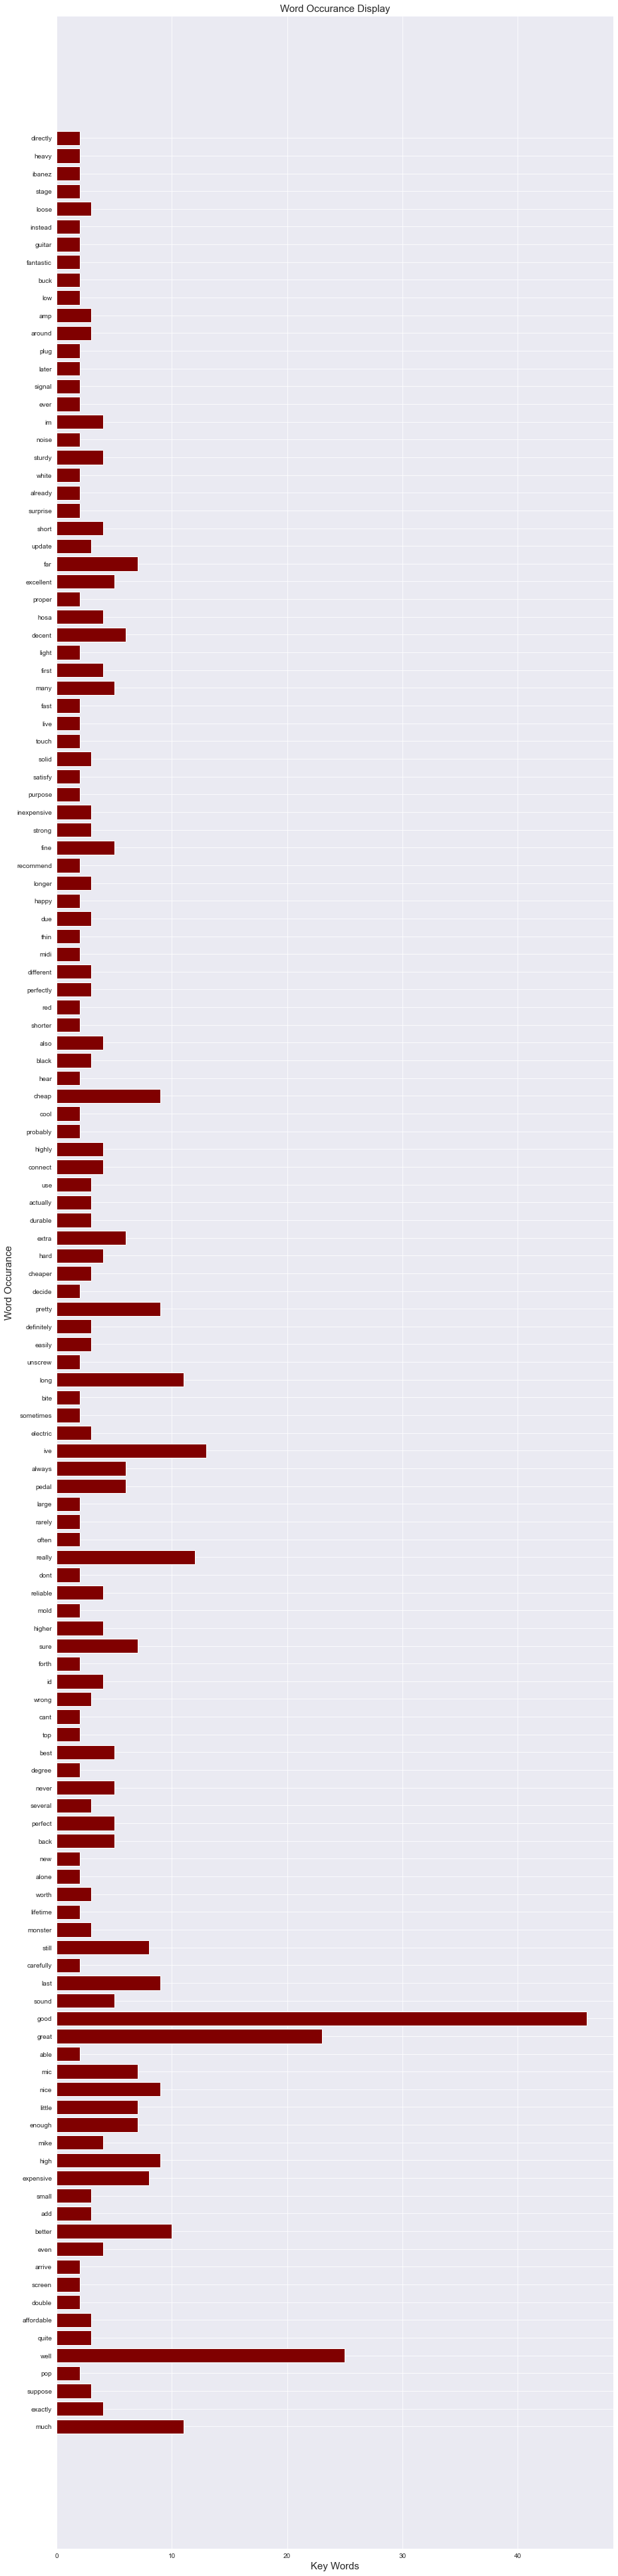

In [7]:
for words in pos_tagging:
    if words[1] == 'ADJ' or words[1] == 'ADV':
        keywords.append(words[0])
word_count = dict(Counter(keywords))
for key in list(word_count.keys()):
    if word_count[key] == 1:
        del word_count[key]
key_words = list(word_count.keys())
values = list(word_count.values())
fig = plt.figure(figsize = (15,70))
plt.barh(key_words, values, color = 'maroon')
plt.xlabel('Key Words', fontsize = 15)
plt.ylabel('Word Occurance', fontsize = 15)
plt.title('Word Occurance Display', fontsize = 15)
plt.show()

In [8]:
lemma = [lemma]

In [9]:
num_features = 300
min_word_count = 2
num_workers = multiprocessing.cpu_count()
context_size = 7
seed = 1
downsampling = 1e-3

In [10]:
word_2_vec = w2v(
    sg=1, 
    seed=seed, 
    workers=num_workers, 
    size=num_features, 
    min_count=min_word_count, 
    window=context_size, 
    sample = downsampling)

In [11]:
t = time()
word_2_vec.build_vocab(lemma, progress_per = 10000)
print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.01 mins


In [12]:
word_2_vec.train(lemma, total_examples=word_2_vec.corpus_count, epochs=30, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.03 mins


In [13]:
word_2_vec.init_sims(replace=True)

In [14]:
word_2_vec.wv.most_similar(positive=["good"])

[('products', 0.9974932670593262),
 ('jacket', 0.9958360195159912),
 ('solid', 0.9951126575469971),
 ('solder', 0.9951023459434509),
 ('joint', 0.9944029450416565),
 ('reliable', 0.9943500757217407),
 ('excellent', 0.9939696788787842),
 ('confidence', 0.9937517642974854),
 ('price', 0.9933691024780273),
 ('rubber', 0.9931199550628662)]

In [15]:
word_2_vec.wv.similarity("good", 'great')


0.9825771

In [16]:
if not os.path.exists('trained'):
    os.makedirs('trained')
word_2_vec.save(os.path.join('trained', 'word_2_vec.w2v'))

In [17]:
word_2_vec = w2v.load(os.path.join('trained', 'word_2_vec.w2v'))

In [18]:
tsne = sklearn.manifold.TSNE(n_components =2, random_state =0)

In [19]:
all_word_vectors_matrix = word_2_vec.wv.syn0

<ipython-input-19-1d29ee87d59a>:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  all_word_vectors_matrix = word_2_vec.wv.syn0


In [20]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [21]:
points = pd.DataFrame(
    [
        (words, coords[0], coords[1])
        for words, coords in [
            (word, all_word_vectors_matrix_2d[word_2_vec.wv.vocab[word].index])
            for word in word_2_vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [22]:
points.head(10)

,word,x,y
0,much,-8.464622,-1.532056
1,exactly,-14.630589,8.919207
2,suppose,-19.693983,20.769455
3,filter,-14.801182,23.188124
4,pop,-14.792747,23.184917
5,sound,-12.337496,-1.830637
6,record,-18.867216,22.628225
7,one,8.709622,-10.268857
8,price,18.335505,-6.967637
9,amazon,-12.171053,1.439627


In [23]:
sns.set_context("poster")

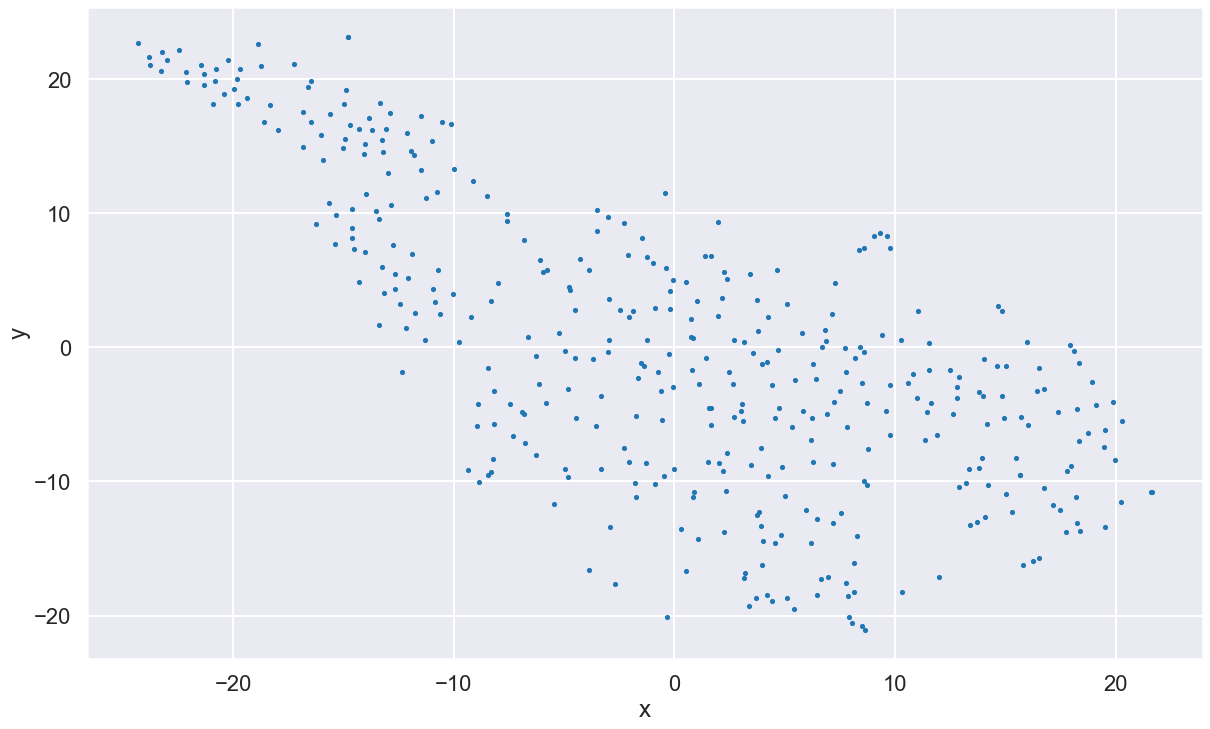

In [24]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [25]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

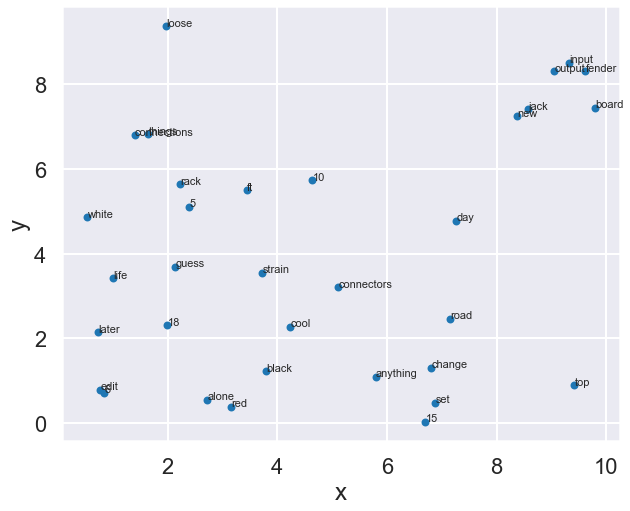

In [26]:
plot_region(x_bounds=(0, 10), y_bounds=(0, 10))